In [9]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [10]:
#Read input file and understand the data
# "default" is my dependent variable

In [11]:
gdf = pd.read_csv("german_credit.csv")
gdf.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [12]:
gdf.shape

(1000, 21)

In [13]:
gdf.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
gdf.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [15]:
gdf.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [16]:
# Lets build a Ensemble model but need to modify the dataset first


In [17]:
gc_df = gdf.drop('default' , axis = 1)
gc_df.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [18]:
gc_df.shape

(1000, 20)

In [19]:
y = gdf[["default"]]
y.head()

,default
0,0
1,1
2,0
3,0
4,1


In [20]:
y.shape

(1000, 1)

# Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [21]:
gc_dummy = pd.get_dummies(gc_df, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since',
                                          'personal_status_sex', 'other_debtors', 'property' , 'other_installment_plans', 'housing',
                                          'job', 'telephone', 'foreign_worker'], drop_first = True)

In [22]:
gc_dummy.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [23]:
gc_dummy.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
duration_in_month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,-0.063467,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,-0.039485,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,0.024961,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,0.001985,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,0.062436,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,0.094435,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,0.010914,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,-0.495358,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,-0.209080,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392
account_check_status_no checking account,-0.063467,-0.039485,0.024961,0.001985,0.062436,0.094435,0.010914,-0.495358,-0.209080,1.000000,...,-0.071871,0.048829,-0.005009,0.104407,-0.066870,0.075366,-0.079080,-0.045023,0.061825,0.017108


In [24]:
gc_dummy.shape

(1000, 48)

### Drop the original variables which are converted to dummy

In [25]:
#dropped it in above code

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(gc_dummy, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [27]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion='entropy',random_state=9999)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [28]:
Random_forest_model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [29]:
from sklearn import metrics
y_predict  = Random_forest_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.7566666666666667


In [30]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
print(confusion_matrix)

[[199  15]
 [ 58  28]]


### Q6 Show the list of the features importance( 1 Marks)

In [31]:
feature_importance = pd.DataFrame(Random_forest_model.feature_importances_, index = x_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending = False)

In [32]:
feature_importance

,importance
credit_amount,0.116350
age,0.090328
duration_in_month,0.086042
account_check_status_no checking account,0.049934
installment_as_income_perc,0.043242
present_res_since,0.038028
account_check_status_< 0 DM,0.033826
credit_history_critical account/ other credits existing (not at this bank),0.031238
other_installment_plans_none,0.023453
savings_... < 100 DM,0.022067


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [34]:
from sklearn import model_selection

In [35]:
# Use below values
num_folds = 10
seed = 77

In [36]:
#Validate the Random Forest model build above using k fold

In [37]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)


In [38]:
#Calculate Mean score

In [39]:
score = model_selection.cross_val_score(Random_forest_model, gc_dummy, y, scoring='neg_mean_squared_error', cv=kfold)

In [40]:
print('Mean score is %.2f'% -score.mean())

Mean score is 0.23


In [41]:
# Calculate score standard deviation using std()

In [42]:
print('score standard deviation is %.2f'% score.std())

score standard deviation is 0.06


# Q8 Print the confusion matrix( 1 Marks)

In [44]:
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(Random_forest_model, gc_dummy, y, cv=10)
CM = metrics.confusion_matrix(y_test,y_predict)
print(CM)

[[199  15]
 [ 58  28]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [45]:
y_train_pred = Random_forest_model.predict(x_train)
print('Testing accuracy is %.3f' % Random_forest_model.score(x_train, y_train))

Testing accuracy is 1.000


In [46]:
y_test_pred = Random_forest_model.predict(x_test)
print('Testing accuracy is %.3f' % Random_forest_model.score(x_test, y_test))

Testing accuracy is 0.757


In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

probability = Random_forest_model.predict_proba(x_test)

probability = probability[:, 1]

In [48]:
# predict class values
yfr = Random_forest_model.predict(x_test)

In [49]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probability)

In [50]:
# calculate F1 score
f1 = f1_score(y_test, yfr)

In [51]:
# calculate precision-recall AUC
AUC = auc(recall, precision)

In [52]:
# calculate average precision score
AP = average_precision_score(y_test, probability)
print('f1=%.2f auc=%.2f ap=%.2f' % (f1, AUC, AP))

f1=0.43 auc=0.60 ap=0.60


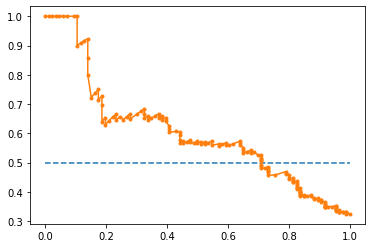

In [54]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
